In [150]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
os.chdir(r"C:\Users\aman.khatri91425\Desktop\HomeCredit\UW\Bureau Imputed Income")
from sklearn.metrics import r2_score
import seaborn as sns


# Read Data

In [178]:
# df = pd.read_csv(os.getcwd()+r"\Data Files\CIR.csv")
df = pd.read_csv(os.getcwd()+r"\Data Files\export.csv")

# Data Cleaning & Date Formatting

In [179]:
df.TIME_CREATION_DATE = pd.to_datetime(df.TIME_CREATION_DATE, format = '%d-%m-%y')
df["MONTH"] = df.TIME_CREATION_DATE.dt.strftime(date_format = '%Y-%m')
df.dropna(subset = ["FINAL_EMI","ESTIMATED_INCOME"], inplace = True)
df = df[df["ESTIMATED_INCOME"]>0]
df.ESTIMATED_INCOME = np.round(df.ESTIMATED_INCOME)

In [153]:
df = df[df.TIME_CREATION_DATE>= pd.datetime(2020,9,1)]
df = df[df.TIME_CREATION_DATE<= pd.datetime(2020,11,30)]

C:\Users\aman.khatri91425\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.
C:\Users\aman.khatri91425\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


# Fill Rates

In [180]:
df[["SKP_CREDIT_CASE","PERFIOS_INCOME","YODLEE_INCOME","SDK_INCOME"]].agg(['count']).reset_index()

,index,SKP_CREDIT_CASE,PERFIOS_INCOME,YODLEE_INCOME,SDK_INCOME
0,count,805907,101198,117009,725007


In [181]:
df_summ=df[["SKP_CREDIT_CASE","PERFIOS_INCOME","YODLEE_INCOME","SDK_INCOME","MONTH"]].groupby("MONTH").agg(['count']).reset_index()
df_summ.columns = ['_'.join([x,y]) for (x,y) in df_summ.columns]
df_summ

,MONTH_,SKP_CREDIT_CASE_count,PERFIOS_INCOME_count,YODLEE_INCOME_count,SDK_INCOME_count
0,2020-01,129400,0,24952,121349
1,2020-02,136370,0,25576,128373
2,2020-03,50350,0,23924,43343
3,2020-04,7225,80,5704,5668
4,2020-05,12805,1102,7242,9885
5,2020-06,23856,5703,7132,18838
6,2020-07,40810,11768,3781,34591
7,2020-08,66588,14940,2040,59313
8,2020-09,64468,18590,2130,54496
9,2020-10,62494,15867,4454,54281


# Correlation Matrix

[Text(0.5, 0, 'ESTIMATED_INCOME'),
 Text(1.5, 0, 'PERFIOS_INCOME'),
 Text(2.5, 0, 'SDK_INCOME')]

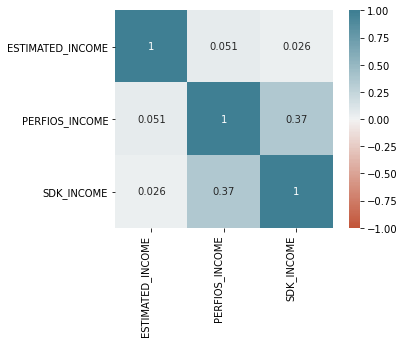

In [182]:
df_corr = df.dropna(subset = ["ESTIMATED_INCOME","PERFIOS_INCOME","SDK_INCOME"])
df_corr = df_corr[(df_corr["ESTIMATED_INCOME"]>0) & (df_corr["PERFIOS_INCOME"]>0) & (df_corr["SDK_INCOME"]>0)]

corr = df_corr[["ESTIMATED_INCOME","PERFIOS_INCOME","SDK_INCOME"]].corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True, annot = True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,horizontalalignment='right')

# Distributions

In [183]:
df_dist[["ESTIMATED_INCOME","PERFIOS_INCOME","SDK_INCOME","YODLEE_INCOME"]].mean()

ESTIMATED_INCOME    22088.430157
PERFIOS_INCOME      61814.750690
SDK_INCOME          47287.180750
YODLEE_INCOME       59441.411159
dtype: float64

In [184]:
df[["ESTIMATED_INCOME","PERFIOS_INCOME","SDK_INCOME","YODLEE_INCOME"]].mean()

ESTIMATED_INCOME    384244.925036
PERFIOS_INCOME       66561.435800
SDK_INCOME           61357.073555
YODLEE_INCOME        65307.832252
dtype: float64

### Perfios

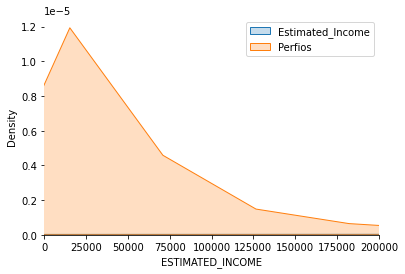

In [185]:
df_dist = df.dropna(subset = ['PERFIOS_INCOME'])
df_dist = df_dist[df_dist["PERFIOS_INCOME"]>0]
plot = sns.kdeplot(df_dist["ESTIMATED_INCOME"], shade=True, label = 'Estimated_Income')
plot = sns.kdeplot(df_dist["PERFIOS_INCOME"], shade=True, label = 'Perfios')
# plot.set(yticklabels=[], xticklabels = [])
plt.xlim(0,200000)
plot.legend()
sns.despine(left=True)

### SDK

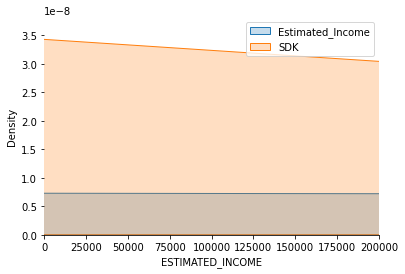

In [186]:
df_dist = df.dropna(subset = ['SDK_INCOME'])
df_dist = df_dist[df_dist["SDK_INCOME"]>0]
plot = sns.kdeplot(df_dist["ESTIMATED_INCOME"], shade=True, label = 'Estimated_Income')
plot = sns.kdeplot(df_dist["SDK_INCOME"], shade=True, label = 'SDK')
# plot.set(yticklabels=[], xticklabels = [])
plt.xlim(0,200000)
plot.legend()
sns.despine(left=True)

In [187]:
df[["ESTIMATED_INCOME","PERFIOS_INCOME","SDK_INCOME","YODLEE_INCOME"]].quantile(0.9)

ESTIMATED_INCOME    526114.200
PERFIOS_INCOME      143318.914
SDK_INCOME          125275.000
YODLEE_INCOME       144618.400
Name: 0.9, dtype: float64

# Create Bins for Analysis

In [188]:
df.head()

,SKP_CREDIT_CASE,FINAL_EMI,ESTIMATED_INCOME,PERFIOS_INCOME,SDK_INCOME,YODLEE_INCOME,TIME_CREATION_DATE,TRADELINE_COUNT,MAX_DPD,HL_FLAG,PRODUCT_GROUP,SCORE_CB,CLIENT_EXI_3M,MONTH
0,289628057,1750.0,5635.0,NaN,38785.0,28110.0,2020-01-01,5,56.0,0,ACL,632.0,N,2020-01
1,289634907,6660.0,21445.0,NaN,NaN,11195.0,2020-01-01,1,0.0,0,ACL,706.0,N,2020-01
2,289593815,1467.0,4724.0,NaN,2000.0,NaN,2020-01-01,2,0.0,0,CD,726.0,Y,2020-01
3,289609788,12855.0,41393.0,NaN,9000.0,NaN,2020-01-01,3,89.0,1,ACL,694.0,N,2020-01
4,289597260,3671.0,11821.0,NaN,NaN,8206.0,2020-01-01,4,0.5,0,ACL,723.0,N,2020-01


In [189]:
df["TRADELINE_COUNT_BIN"]=np.where(df["TRADELINE_COUNT"]<=2,'1) 0-2',np.where(df["TRADELINE_COUNT"]<=4,'2) 3-4', '3) >=5'))
df["TRADELINE_COUNT_BIN"].value_counts().sort_index()

1) 0-2    178978
2) 3-4    155725
3) >=5    471204
Name: TRADELINE_COUNT_BIN, dtype: int64

In [190]:
df["MAX_DPD_BIN"]=np.where(df["MAX_DPD"]==0,'1). 0',np.where(df["MAX_DPD"]<=10,'2). 1-10',np.where(df["MAX_DPD"]<=20,'3). 11-20','4. >20')))
df["MAX_DPD_BIN"].value_counts().sort_index()

1). 0        379434
2). 1-10     124313
3). 11-20     19560
4. >20       282600
Name: MAX_DPD_BIN, dtype: int64

In [191]:
df["SCORE_CB_BIN"]=np.where(df["SCORE_CB"]<0,'1). <0',np.where(df["SCORE_CB"]<=565,'2). 0-565',
                                    np.where(df["SCORE_CB"]<=680,'3). 566-680',np.where(df["SCORE_CB"]<=720,'4). 680-720',
                                    np.where(df["SCORE_CB"]<=750,'5). 720-750','7. >750')))))
df["SCORE_CB_BIN"].value_counts().sort_index()

1). <0           3958
2). 0-565       23283
3). 566-680    121919
4). 680-720    217617
5). 720-750    217670
7. >750        221460
Name: SCORE_CB_BIN, dtype: int64

In [192]:
df["FINAL_EMI_BIN"]=np.where(df["FINAL_EMI"]<=3000,'1). 0-1K',np.where(df["FINAL_EMI"]<=10000,'2). 3K-10K',np.where(df["FINAL_EMI"]<=30000,'3). 10K-30k','4. >30')))
df["FINAL_EMI_BIN"].value_counts().sort_index()

1). 0-1K       235774
2). 3K-10K     206314
3). 10K-30k    148610
4. >30         215209
Name: FINAL_EMI_BIN, dtype: int64

# Goodness Of Fit

In [193]:
summary_by = ["HL_FLAG","PRODUCT_GROUP","CLIENT_EXI_3M","MONTH", "FINAL_EMI_BIN", "SCORE_CB_BIN","MAX_DPD_BIN", "TRADELINE_COUNT_BIN"]

In [194]:
income_type = ["PERFIOS_INCOME", "YODLEE_INCOME", "SDK_INCOME"]

In [195]:
dic = {'income_type':[],
      'summary_by':[],
      'bins':[],
      'r-square':[],
        'correlation':[],
       'ratio':[],
       'avg_final_emi':[],
       'avg_est_income':[],
       'avg_act_income':[],
       'case_count':[]
      }

In [196]:
for inc_type in income_type:
    df_tmp = df.dropna(subset = [inc_type])
    df_tmp = df_tmp[df_tmp[inc_type]>0]
    for x in summary_by:
        for bin in df_tmp[x].unique():
            df_summ = df_tmp[df_tmp[x]==bin]
            dic["income_type"].append(inc_type)
            dic["summary_by"].append(x)
            dic["bins"].append(bin)
            dic["r-square"].append(round(r2_score(df_summ[inc_type],df_summ["ESTIMATED_INCOME"]),2))
            dic["correlation"].append(round(np.corrcoef(df_summ[inc_type],df_summ["ESTIMATED_INCOME"])[0,1],2))
            dic["ratio"].append(round(np.sum(df_summ[inc_type])/sum(df_summ["FINAL_EMI"]),2))
            dic["avg_final_emi"].append(round(np.mean(df_summ['FINAL_EMI']),0))
            dic["avg_est_income"].append(round(np.mean(df_summ['ESTIMATED_INCOME']),0))
            dic["avg_act_income"].append(round(np.mean(df_summ[inc_type]),0))
            dic["case_count"].append(len(df_summ))                                     

C:\Users\aman.khatri91425\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\aman.khatri91425\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\aman.khatri91425\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\aman.khatri91425\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\aman.khatri91425\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less 

In [197]:
pd.DataFrame(dic)

,income_type,summary_by,bins,r-square,correlation,ratio,avg_final_emi,avg_est_income,avg_act_income,case_count
0,PERFIOS_INCOME,HL_FLAG,0,-260.25,0.05,0.69,94303.0,303654.0,64999.0,94401
1,PERFIOS_INCOME,HL_FLAG,1,-1862.36,0.07,0.21,428158.0,1378669.0,90010.0,6665
2,PERFIOS_INCOME,PRODUCT_GROUP,ACL,-423.32,0.05,0.54,123868.0,398854.0,66958.0,67849
3,PERFIOS_INCOME,PRODUCT_GROUP,CD,-171.41,0.07,0.58,98431.0,316948.0,57234.0,19098
4,PERFIOS_INCOME,PRODUCT_GROUP,CL,-422.61,0.04,0.49,133136.0,428698.0,65074.0,3592
...,...,...,...,...,...,...,...,...,...,...
108,SDK_INCOME,MAX_DPD_BIN,2). 1-10,-37.86,0.01,0.52,135365.0,435876.0,69952.0,109233
109,SDK_INCOME,MAX_DPD_BIN,3). 11-20,-28.60,0.03,0.56,138366.0,445538.0,78042.0,17394
110,SDK_INCOME,TRADELINE_COUNT_BIN,3) >=5,-119.41,0.01,0.40,190067.0,612016.0,76931.0,422840
111,SDK_INCOME,TRADELINE_COUNT_BIN,1) 0-2,-1.31,0.01,2.44,15007.0,48322.0,36649.0,160474


In [198]:
pd.DataFrame(dic).to_csv("summary.csv", index = False)

# Archieve

In [15]:
df_perfios = df.dropna(subset = ['PERFIOS_INCOME'])
df_perfios = df_perfios[df_perfios["PERFIOS_INCOME"]>0]

In [17]:
df_perfios.shape

(119424, 14)

In [19]:
df_perfios.head()

,SKP_CREDIT_CASE,FINAL_EMI,ESTIMATED_INCOME,PERFIOS_INCOME,SDK_INCOME,YODLEE_INCOME,TIME_CREATION_DATE,TRADELINE_COUNT,MAX_DPD,HL_FLAG,PRODUCT_GROUP,SCORE_CB,CLIENT_EXI_3M,MONTH
389532,302193954,1300.0,4186.0,69738.17,20095.0,NaN,2020-04-23,1,0.0,0,ACL,737.0,N,2020-04
389546,302166989,32955.0,106115.0,45649.56,70809.0,NaN,2020-04-23,7,7.0,0,ACL,721.0,N,2020-04
389551,302183521,2237281.0,7204045.0,285322.49,NaN,NaN,2020-04-23,16,0.5,0,ACL,777.0,N,2020-04
389580,302175927,33012.0,106299.0,69970.54,41059.0,NaN,2020-04-23,12,0.0,0,ACL,727.0,N,2020-04
389581,302199130,7005.0,22556.0,55249.17,11313.0,NaN,2020-04-23,3,0.0,0,ACL,705.0,N,2020-04


### Overall

In [20]:
from sklearn.metrics import r2_score
def r_sq(income_pred, income_act):
    return r2_score(income_act, income_pred)

def corr(income_pred, income_act):
    return np.corrcoef(income_act, income_pred)[0,1]

def ratio(emi, income_act):
    return np.sum(income_act)/np.sum(emi)
    

In [21]:
print(r2_score(df_perfios["PERFIOS_INCOME"],df_perfios["ESTIMATED_INCOME"]))

-325.95858797943174


In [22]:
print(np.corrcoef(df_perfios["PERFIOS_INCOME"],df_perfios["ESTIMATED_INCOME"])[0,1])

0.05109160639718854


In [23]:
print(np.sum(df_perfios["PERFIOS_INCOME"])/sum(df_perfios["FINAL_EMI"]))

0.6503242029739614
